# Notes de recherche

Au cours de mes nombreuses recherches sur l'Orbe, j'ai pu accumuler certaines techniques de codage. Même si le fonctionnement de certaines m'est encore mystérieux, je les consigne dans ces notes, en espérant qu'elles me serviront un jour...

J.A. 

## I - Manipuler des fichiers .txt en Python 

Python permet apparement d'écrire et de lire des fichiers .txt grâce à l'utilisation de quelques lignes de code. Voici une liste de commandes dont j'ai déjà pris connaissance :

In [1]:
#Les commandes suivantes créent un nouveau fichier .txt, apparement localisé dans le même dossier que le notebook...
fichier = open("alphabet.txt",'w')#The "w" means that the file is opened write-only...
fichier.write("alpha beta gamma delta epsilon\nzeta eta theta iota kappa\nlambda mu nu xi omicron")
fichier.close()

In [2]:
#Je peux aussi ouvrir un fichier existant et récuperer son contenu.
fichier = open("alphabet.txt",'r')#...and the "r" means that the file is opened read-only. I.J.
texte = fichier.read()
print(texte)
fichier.close()

alpha beta gamma delta epsilon
zeta eta theta iota kappa
lambda mu nu xi omicron


In [3]:
#Je n'ai toutefois pas encore compris le fonctionnement du code suivant...
fichier = open("alphabet.txt",'r')
lignes = fichier.readlines()
cpt = 1
liste = []
for ligne in lignes:
    mots = ligne.split()#I don't understand how this line works. What does the split method really do? I.J.
    for mot in mots :
        print(cpt,mot)
        liste.append(mot)
        cpt += 1

print("\n")
print("liste = ",liste)

1 alpha
2 beta
3 gamma
4 delta
5 epsilon
6 zeta
7 eta
8 theta
9 iota
10 kappa
11 lambda
12 mu
13 nu
14 xi
15 omicron


liste =  ['alpha', 'beta', 'gamma', 'delta', 'epsilon', 'zeta', 'eta', 'theta', 'iota', 'kappa', 'lambda', 'mu', 'nu', 'xi', 'omicron']


## II - Images et Matrices

Lorsque je dispose d'une matrice de flottants, la méthode `plt.imshow` me permet de l'afficher sous forme d'une image formée d'une multitude de pixels. Je crois comprendre que plus le nombre correspondant est grand, plus le pixel affiché est clair...

A = 
 [[0. 1. 2. 3. 4.]
 [1. 2. 3. 4. 5.]
 [2. 3. 4. 5. 6.]
 [3. 4. 5. 6. 7.]
 [4. 5. 6. 7. 8.]] 
 B = 
 [[ 0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  2.  4.  6.  8.]
 [ 0.  3.  6.  9. 12.]
 [ 0.  4.  8. 12. 16.]] 
 C = 
 [[0.         0.         0.         0.         0.        ]
 [1.         0.5        0.33333333 0.25       0.2       ]
 [2.         1.         0.66666667 0.5        0.4       ]
 [3.         1.5        1.         0.75       0.6       ]
 [4.         2.         1.33333333 1.         0.8       ]]


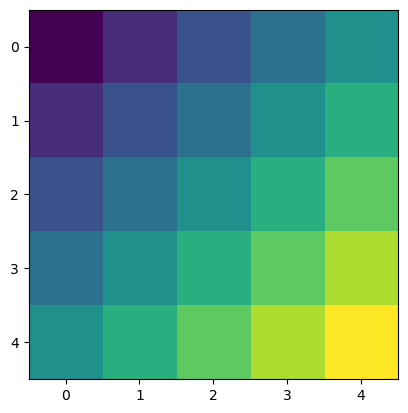

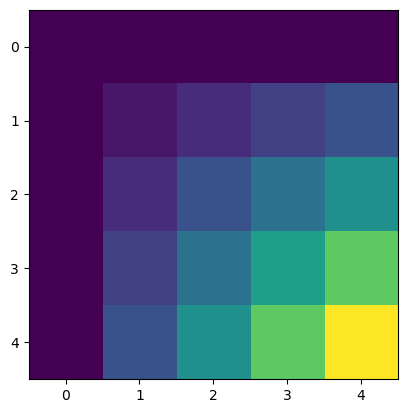

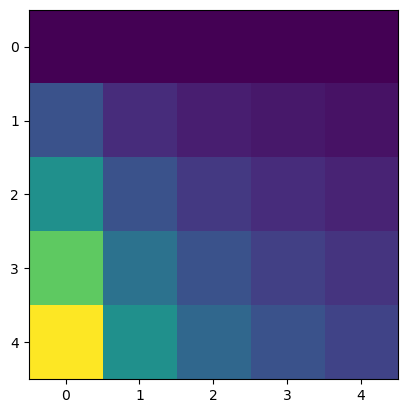

In [4]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

a = 5
b = 5

A = np.zeros((a,b))
B = np.zeros((a,b))
C = np.zeros((a,b))

for i in range(a):
    for j in range(b):
        A[i,j]=i+j
        
for i in range(a):
    for j in range(b):
        B[i,j]=i*j
    
for i in range(a):
    for j in range(b):
        C[i,j]=i/(j+1)
        
print("A = \n",A,"\n","B = \n",B,"\n","C = \n",C)
plt.imshow(A)#For displaying a grayscale image, like a black and white one, use the parameters cmap='gray', vmin=0, vmax=255. I.J.
plt.show()
plt.imshow(B)
plt.show()
plt.imshow(C)

## III - Résolution numérique des équations différentielles

Cette partie est peut-être la plus technique de toutes celles auxquelles j'ai été confronté.e... J'essaye de rédiger ces notes de la manière la plus rigoureuse et synthétique possible, mais les idées s'enchaînent, alors, chers amis lecteurs, vous êtes prévenus : soyez concentrés.

L'idée de base semble être la suivante : si l'on rencontre un problème de Cauchy, c'est-à-dire une équation dont l'inconnue est une fonction $y$ devant vérifier les conditions

$$\left\{\begin{array}{ccc}
y'(t)&=&f(t,y(t))\\
y(t_0)&=&y_0\end{array}\right.,$$

où $f:\mathbb{R}\times \mathbb{R}\to \mathbb{R}$ est une fonction et $y_0\in\mathbb{R}$ un réel, alors le problème se reformule en primitivant la première égalité en

$$\left\{\begin{array}{ccc}
y(t)&=&\int f(t,y(t))dt\\
y(t_0)&=&y_0\end{array}\right..$$

Or, si je veux obtenir une solution approchée de ma solution $y$ sur un intervalle $[t_0,T]$, je peux visiblement me servir de cette seconde formulation : je divise cet intervalle en des valeurs $t_0<t_1<\dots<t_N=T$ et j'obtiens les valeurs $y_i:=y(t_i)$ via la suite récurrente

$$y_{i+1}-y_i=y(t_{i+1})-y(t_i)=\int_{t_i}^{t_{i+1}}f(t,y(t))dt\iff y_{i+1}=y_i+\int_{t_i}^{t_{i+1}}f(t,y(t))dt.$$

Bien sûr, cette définition pose deux problèmes : la suite est *définie à l'aide de la solution $y$*, qui nous est inconnue, et en plus il faut savoir *intégrer* une fonction, ce que je ne sais faire que de manière approchée ! Mais le fait remarquable (que je commence seulement à comprendre) est que la résolution de ce second problème va automatiquement résoudre le premier. Car je connais déjà des méthodes numériques d'intégration qui n'utilisent que **certaines valeurs de la fonction à intégrer** ! Ainsi, la méthode des **rectangles à gauche** donne :

$$y_{i+1}=y_i+\int_{t_i}^{t_{i+1}}f(t,y(t))dt\simeq y_i+(t_{i+1}-t_i)\times f(t_i,y(t_i)),$$

et la formule de récurrence devient subitement explicite ! C'est d'ailleurs pour cette raison que les écrits dans lesquels je suis allé.e récupérer cette méthode semblent la nommer **méthode d'Euler explicite**... 

D'autre part, lorsque j'utilise comme schéma numérique la méthode des **rectangles à droite**, j'obtiens la formule :

$$y_{i+1}=y_i+\int_{t_i}^{t_{i+1}}f(t,y(t))dt\simeq y_i+(t_{i+1}-t_i)\times f(t_{i+1},y(t_{i+1})),$$

donc la valeur cherchée $y_{i+1}$ me demande de résoudre une équation, d'où le nom cette fois-ci (me semble-t-il) de **méthode d'Euler implicite**... Mais c'est un problème que je sais lui aussi résoudre. En effet, je peux reformuler cette équation en

$$y_i+(t_{i+1}-t_i)\times f(t_{i+1},y(t_{i+1}))-y_{i+1}=0,$$

et la valeur cherchée est un zéro de la fonction 

$$F_i:y\mapsto y_i+(t_{i+1}-t_i)\times f(t_{i+1},y)-y=0.$$

J'ai décidé de mettre un indice $i$ à cette fonction annexe $F_i$, car il me semble important de remarquer qu'elle est différente à chaque étape, étant donné qu'elle dépend par exemple de la valeur $y_i$ déterminée à l'étape précédente...

Voici ce qu'ont donné mes divers tests sur un problème de Cauchy dont je connais (fort heureusement) la solution : l'équation

$$\left\{\begin{array}{ccc}
y'(t)&=&y(t)\\
y(0)&=&1\end{array}\right..$$

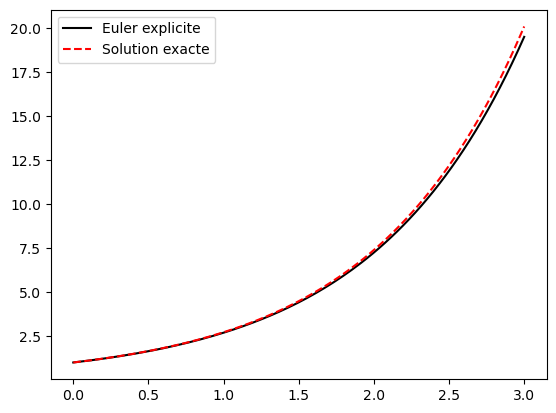

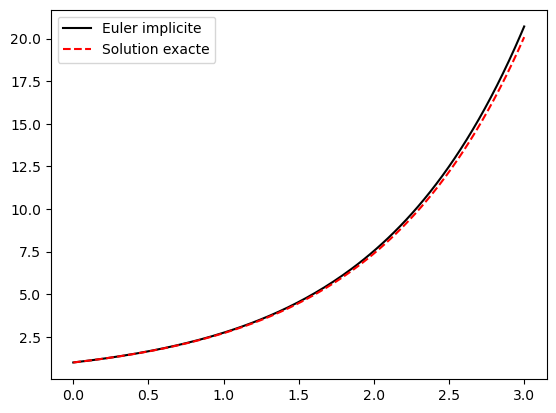

In [5]:
#Le problème de Cauchy y'(t)=y(t), y(0)=1

N = 150
I = np.linspace(0,3,N)#Je cherche à déterminer une approximation de ma solution sur l'intervalle [0,3], 
                        #que je choisis de diviser de manière uniforme : ainsi la distance t_{i+1}-t_{i} 
                        #sera constate, égale à un pas h que je peux facilement déterminer.
h = I[1]-I[0]

#Méthode d'Euler explicite

Yexp = []
y0 = 1#Je connais d'après le problème la valeur de ma solution en 0.
Yexp.append(y0)

for i in range(1,N):
    y0 = y0+h*y0#Car dans ce problème de Cauchy particulier, f(t,y)=y.
    Yexp.append(y0)

plt.plot(I,Yexp,'k',label="Euler explicite")#le tracé donné par la méthode d'Euler explicite.
plt.plot(I,np.exp(I),'r--',label="Solution exacte")#le tracé donné par la solution exacte, en pointillés.
plt.legend()
plt.show()

#Méthode d'Euler implicite

Yimp = []
y0 = 1#Je connais d'après le problème la valeur de ma solution en 0.
Yimp.append(y0)

for i in range(1,N):
    y0 = 1/(1-h)*y0#You were lucky, because in this case the implicit method equation 
    Yimp.append(y0)#was easy to solve by hand!This will not always be the case... I.J.

plt.plot(I,Yimp,'k',label="Euler implicite")#le tracé donné par la méthode d'Euler implicite.
plt.plot(I,np.exp(I),'r--',label="Solution exacte")#le tracé donné par la solution exacte, en pointillés.
plt.legend()
plt.show()

Sans doute que d'autres méthodes d'intégration numérique fournissent d'autres méthodes de résolution d'équation différentielles... Je note que c'est quelque chose qu'il serait intéressant d'explorer. Peut-être même que la formule d'erreur de la méthode numérique entraîne l'existence d'une formule d'erreur de la méthode de résolution de l'équation différentielle... *Si jamais je finis ma quête plus tôt que prévu, je m'autoriserai à m'intéresser à l'étude mathématique de ce genre de questions*.